In [80]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from konlpy.tag import Okt
okt = Okt()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
import time
from sklearn.feature_extraction.text import CountVectorizer # 빈도 기준



In [157]:
raw = pd.read_csv('TW.csv')

raw

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4519,4520,4521,4522,4523,4524,4525,4526,4527,4528
0,0,서울특별시 가산동,명가냉면-금천점,4.0,4.1,4.2,4,올여름 냉면은 이집에서 먹을거예요,잘먹었어요 배송빨라요,넉넉한 인심\r\n맛나게 잘 먹었습니다,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,서울특별시 가산동,강금숙후다닭,4.6,4.8,4.6,4.5,정말 제발 쫌 요청사항 봐요 일회용품 안받는다고 세번 주문하면서 세번 써도 한번을 안봐요,몰랐던 맛집 양많고 맛있습니다 꼭 시켜드세요!,먹었음. . . . . . . . . . . .,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,서울특별시 가산동,신의주찹쌀순대-구로점,4.4,4.5,4.3,4.3,다맛있고괜찮은데 반찬 만들어져있는건가요 이건 김치오래두면 피는 곰팡이같은데 깍두기따...,평소 신의주순대국 좋아하는데 이번에는 순대국에서 냄새가 좀 있었어요. 개선해주시면 ...,정말 맛있었어요 엄지척,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,서울특별시 가산동,굴파전전문점,3.4,0.0,0.0,0,"배달도 늦고, 맛도 가격대비 아쉽네요",보통요,가운데 좀 덜 익음\r\n시간이나 서비스는 좋아요,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,서울특별시 가산동,김명태굴국밥솥밥-가산점,4.3,4.5,4.2,4.2,조금짜고 조금식어서와서 별한개빼지만..\r\n전체적으로 맛은좋아요,맛있게 잘먹었습니다,맛있게 잘먹었습니다,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,서울특별시 가산동,춘천아재닭갈비-광명점,4.3,4.5,4.2,4.3,가격과 구성이 혜자스러워요 혼밥하기 딱입니다 항상 잘먹고있어요,신랑이 다 식은거 먹었는데도 맛있다고 했어요!,상추쌈 안왔어요 쌈장만 오네요,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,서울특별시 가산동,엄마손토종마을,3.9,4.4,4.1,3.7,저는 맛있어요~~\r\n맛없음 리뷰안남기려했는데..\r\n깨끗히 남김없이 먹었네요....,해장하기 딱 좋은집,전복삼계탕이랑 한방삼계탕이랑 전복 작은거 하나들어간것빼고는 별다른 차이가...들깨삼...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,서울특별시 가산동,놀부부대찌개-구로디지털단지역점,4.5,4.4,4.6,4.6,가서먹는게최고인가봐요ㅜㅜ,같은 브랜드 라고해도 조금씩 차이가있네요~~^^;;\r\n보통입니다,제가 알고있는 지점보다 맛도 양도 다른거 같아요,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,서울특별시 가산동,이디야커피-가산두산위브점,4.6,4.5,4.9,5,나가기 귀찮을때마다 애용합니다,나가기 귀찮을때 유용하네요,맛있게 잘 먹었습니다.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,서울특별시 가산동,홍춘천치즈닭갈비-롯데캐슬점,4.6,4.5,4.4,4.6,맛있게 잘 먹었습니다~,진짜매콤하니 맛있어요 양도많고 재료도신선하네요\r\n다음에도주문 고고 다음에도맛있...,너무 맛있어요 또 시켜먹을거예요,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
grouped = raw.groupby('0').mean()

In [160]:
def asd(s):
    return 5-s
grouped['맛'] = grouped['2'].apply(asd)
grouped['양'] = grouped['3'].apply(asd)
grouped['배달'] = grouped['4'].apply(asd)
grouped

,Unnamed: 0,2,3,4,맛,양,배달
0,,,,,,,
서울특별시 가산동,14.0,4.189655,4.155172,4.134483,0.810345,0.844828,0.865517
서울특별시 가양동,38.5,4.455000,4.460000,4.530000,0.545000,0.540000,0.470000
서울특별시 가회동,63.0,4.389655,4.489655,4.462069,0.610345,0.510345,0.537931
서울특별시 갈현동,92.0,4.486207,4.575862,4.496552,0.513793,0.424138,0.503448
서울특별시 개봉동,121.0,4.275862,4.382759,4.320690,0.724138,0.617241,0.679310
서울특별시 개포동,150.0,4.437931,4.489655,4.482759,0.562069,0.510345,0.517241
서울특별시 거여동,174.5,4.250000,4.005000,3.920000,0.750000,0.995000,1.080000
서울특별시 계동,199.0,4.327586,4.510345,4.465517,0.672414,0.489655,0.534483
서울특별시 고덕동,228.0,4.282759,4.317241,4.427586,0.717241,0.682759,0.572414


In [166]:
grouped.to_csv("Documents.csv", encoding = 'ms949')

In [164]:
grouped.head()

,Unnamed: 0,2,3,4,맛,양,배달
0,,,,,,,
서울특별시 가산동,14.0,4.189655,4.155172,4.134483,0.810345,0.844828,0.865517
서울특별시 가양동,38.5,4.455000,4.460000,4.530000,0.545000,0.540000,0.470000
서울특별시 가회동,63.0,4.389655,4.489655,4.462069,0.610345,0.510345,0.537931
서울특별시 갈현동,92.0,4.486207,4.575862,4.496552,0.513793,0.424138,0.503448
서울특별시 개봉동,121.0,4.275862,4.382759,4.320690,0.724138,0.617241,0.679310


In [136]:
df.to_frame()

NameError: name 'df' is not defined

In [135]:
dfTW = pd.read_csv(r"TW.csv", index_col=0)
dfTW['0'].groupby([dfTW['0'], dfTW['3']]).mean()

DataError: No numeric types to aggregate

In [82]:
def strip_e(st):
    try:
        RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
        return RE_EMOJI.sub(r'', st)
    except:
        return ''

In [83]:
#이게 한 동꺼 frequency
dong_freq_list = []
for dong in raw['0'].unique():
    temp = raw[raw['0']==dong]
    comment_col = temp.columns[7:]
    dong_comments = []
    for col in comment_col:
        tmp = temp[col].tolist()
        for i in range(len(tmp)):
            tmp[i] = strip_e(tmp[i])
            tmp[i] = okt.morphs(tmp[i],norm=True,stem=True)
            tmp[i] = ' '.join(tmp[i])
            dong_comments.append(tmp[i])
    try:
        count_vect = CountVectorizer()
        cvect = count_vect.fit_transform(dong_comments)
        dtme = pd.DataFrame(cvect.todense(), columns=count_vect.get_feature_names())
        freq = dtme.sum(axis=0).sort_values()
        dong_freq_list.append([dong,freq])
    except:
        pass

KeyboardInterrupt: 

In [108]:
import pickle
with open('dong_freq_list.pickle', 'wb') as handle:
    pickle.dump(dong_freq_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [75]:
#with open('noun.txt', 'wb') as f:
   # pickle.dump(dong_freq_list, f)

In [130]:
with open('twtw.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [120]:
with open('dong_freq_list.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [131]:
pd.DataFrame(b[0][1]).to_csv()

',0\n000,1\n오삼,1\n넣기,1\n오심,1\n넘어서,1\n오피스텔,1\n오해,1\n넘맛이씅너우넝,1\n넘기고왓네여,1\n네나,1\n넘게기다렸는데,1\n옷다배렸다,1\n와도,1\n와중,1\n완넌,1\n냉장,1\n왓구,1\n왓습,1\n냉국,1\n넓적하다,1\n왓음,1\n네네,1\n오묘하다,1\n영도,1\n놈온,1\n놀리다,1\n영아,1\n영향,1\n놀랏습니,1\n옅다,1\n예상하고주문하세요,1\n오바이트,1\n예여,1\n오금,1\n노오,1\n노숙자,1\n노소,1\n오뚜기,1\n오래간만,1\n오랬,1\n노노,1\n녹색,1\n왠욜,1\n내비,1\n외주,1\n우롱,1\n우수,1\n우어,1\n난후,1\n난생처음,1\n우울하다,1\n우웅,1\n난데없이,1\n날숨,1\n운빵,1\n낚시,1\n나주고,1\n나이,1\n웃기다,1\n나유,1\n워오,1\n나영,1\n나아아,1\n낚임,1\n우렁이,1\n우렁쌈밮,1\n우렁쌈밥,1\n내려오다,1\n내려놓다,1\n요거트,1\n내년,1\n요건,1\n요것,1\n낱개,1\n낮추다,1\n요도,1\n요런,1\n났어욤,1\n요물,1\n요전,1\n요추,1\n요플레,1\n욕심,1\n욕처런,1\n남겻,1\n우도,1\n엿보다,1\n염전,1\n열점,1\n누가,1\n양푼,1\n달콤새콤,1\n달콤맛,1\n달짝지근하다,1\n어김없이,1\n어늣나면,1\n어덯,1\n어딨다,1\n닭꼬치,1\n달라붙다,1\n어머,1\n단순하다,1\n단면,1\n단말,1\n닦다,1\n다태,1\n다치다,1\n다짜고짜,1\n어떨,1\n양좀,1\n닭맛,1\n닭뼈,1\n대기라면서,1\n알싸하다,1\n알짝,1\n앓이,1\n압니,1\n압도,1\n앖어,1\n당시,1\n애도,1\n애호가,1\n야곱,1\n야무지다,1\n담점,1\n담박하다,1\n양녕,1\n담그다,1\n닭특유,1\n양돟,1\n닭질,1\n어찌나,1\n월드컵,1\n다좋습니댜,1\n어휴,1\n에밀,1\n는커녕,1\n는데,1\n에혀,1\n엔비,1\n엘리베이터,1\n눌렸길,1\n눌려,1\n에라도,1\n여타,1\n여하튼,1\n눈물,1\n여행,1

In [123]:
abc = dict(dong_freq_list[0][1])
abc

{'000': 1,
 '소망': 1,
 '소면': 1,
 '소문': 1,
 '소요는': 1,
 '소요예상시긴이였는데': 1,
 '소자': 1,
 '소정': 1,
 '소중하다': 1,
 '소하': 1,
 '속눈썹': 1,
 '속상하다': 1,
 '속은쫀득': 1,
 '손가락': 1,
 '소리치다': 1,
 '손보': 1,
 '손질': 1,
 '손편지': 1,
 '쇠고기': 1,
 '쇠맛': 1,
 '쇼콜라': 1,
 '수록': 1,
 '수많다': 1,
 '수명': 1,
 '수분': 1,
 '수세미': 1,
 '수술': 1,
 '수액': 1,
 '수업': 1,
 '손잡이': 1,
 '수익': 1,
 '소개': 1,
 '셧음': 1,
 '설레다': 1,
 '설상가상': 1,
 '설연휴': 1,
 '설정': 1,
 '섭수': 1,
 '섭스': 1,
 '성격': 1,
 '성공': 1,
 '성공하다': 1,
 '성산': 1,
 '성애자': 1,
 '성은': 1,
 '성지': 1,
 '셰프': 1,
 '성질': 1,
 '세계': 1,
 '세미': 1,
 '세밀': 1,
 '세영': 1,
 '세우다': 1,
 '세자매': 1,
 '센치': 1,
 '셀러드': 1,
 '셋트류': 1,
 '셋트메뉴': 1,
 '셧다': 1,
 '셧더': 1,
 '셧었': 1,
 '성품': 1,
 '설날': 1,
 '수재': 1,
 '수트': 1,
 '승현': 1,
 '시가': 1,
 '시계': 1,
 '시긴': 1,
 '시내': 1,
 '시대': 1,
 '시들시들': 1,
 '시들하다': 1,
 '시래기': 1,
 '시리즈': 1,
 '시비': 1,
 '시스템': 1,
 '시싯': 1,
 '슴돠': 1,
 '시언': 1,
 '시초': 1,
 '시켜먹깅': 1,
 '시켜먹엇구': 1,
 '시켜봣는뎨': 1,
 '시켯': 1,
 '시켯는뎅': 1,
 '시켯던': 1,
 '시켱': 1,
 '시킬껍니': 1,
 '시퍼': 1,
 '식구': 1,
 '식도': 1,
 '식신': 1,
 '시일': 1,
 

In [124]:
from PIL import Image, ImageFilter

In [125]:
okt.morphs('맛있음 맛있어요 맛있네 맛좋아 ',norm=True,stem=True)

['맛있다', '맛있다', '맛있다', '맛', '좋다']

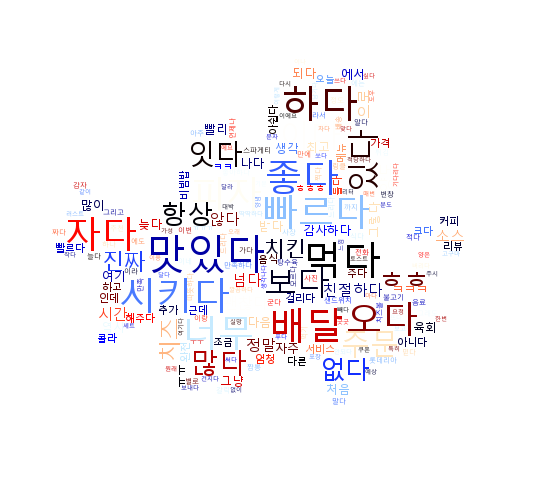

In [126]:
wordcloud = WordCloud(background_color = "white",
                    font_path = "c:/Windows/Fonts/malgun.ttf",  
                    mask = np.array(Image.open("seoul_map.png")),
                    colormap = "flag",
                    relative_scaling = 0.1,
                    max_font_size = 40)

wordcloud.generate_from_frequencies(abc)  #워드클라우드에 넣어주고 싶은 것의 딕셔너리 파일을
wordcloud.to_image()

In [127]:
#워드클라우드에 넣지 않을 단어들을 k_stopwords로 지정해주고, tokens_noun에서 그 단어들 제외해주기
k_stopwords = ["오다"]
tokens_noun = [each for each in tokens_noun if each not in k_stopwords]
tokens_noun

NameError: name 'tokens_noun' is not defined